<a href="https://colab.research.google.com/github/lancemelon/playing_card_detection/blob/main/card_detection_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Oct 10 00:37:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("augmented-startups").project("playing-cards-ow27d")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Playing-Cards-4 in yolov8:: 100%|██████████| 48478/48478 [00:08<00:00, 5447.14it/s]


In [ ]:
%cd {dataset.location}
%ls

/content/Playing-Cards-4
data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/  valid/


In [ ]:
!sed -i 's|../test/images|{dataset.location}/test/images|' {dataset.location}/data.yaml
!sed -i 's|Playing-Cards-4/train/images|{dataset.location}/train/images|' {dataset.location}/data.yaml
!sed -i 's|Playing-Cards-4/valid/images|{dataset.location}/valid/images|' {dataset.location}/data.yaml

In [ ]:
%cd {dataset.location}
%ls

/content/Playing-Cards-4
data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/  valid/


In [ ]:
!cat data.yaml

names:
- 10C
- 10D
- 10H
- 10S
- 2C
- 2D
- 2H
- 2S
- 3C
- 3D
- 3H
- 3S
- 4C
- 4D
- 4H
- 4S
- 5C
- 5D
- 5H
- 5S
- 6C
- 6D
- 6H
- 6S
- 7C
- 7D
- 7H
- 7S
- 8C
- 8D
- 8H
- 8S
- 9C
- 9D
- 9H
- 9S
- AC
- AD
- AH
- AS
- JC
- JD
- JH
- JS
- KC
- KD
- KH
- KS
- QC
- QD
- QH
- QS
nc: 52
roboflow:
  license: Public Domain
  project: playing-cards-ow27d
  url: https://universe.roboflow.com/augmented-startups/playing-cards-ow27d/dataset/4
  version: 4
  workspace: augmented-startups
test: /content/Playing-Cards-4/test/images
train: /content/Playing-Cards-4/train/images
val: /content/Playing-Cards-4/valid/images


In [ ]:
%cd {HOME}

/content


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 batch=16 patience=5 plots=True

100% 21.5M/21.5M [00:00<00:00, 165MB/s] 
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Playing-Cards-4/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1728520766.8be97c27a39a.5248.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch19890.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch19891.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch19892.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


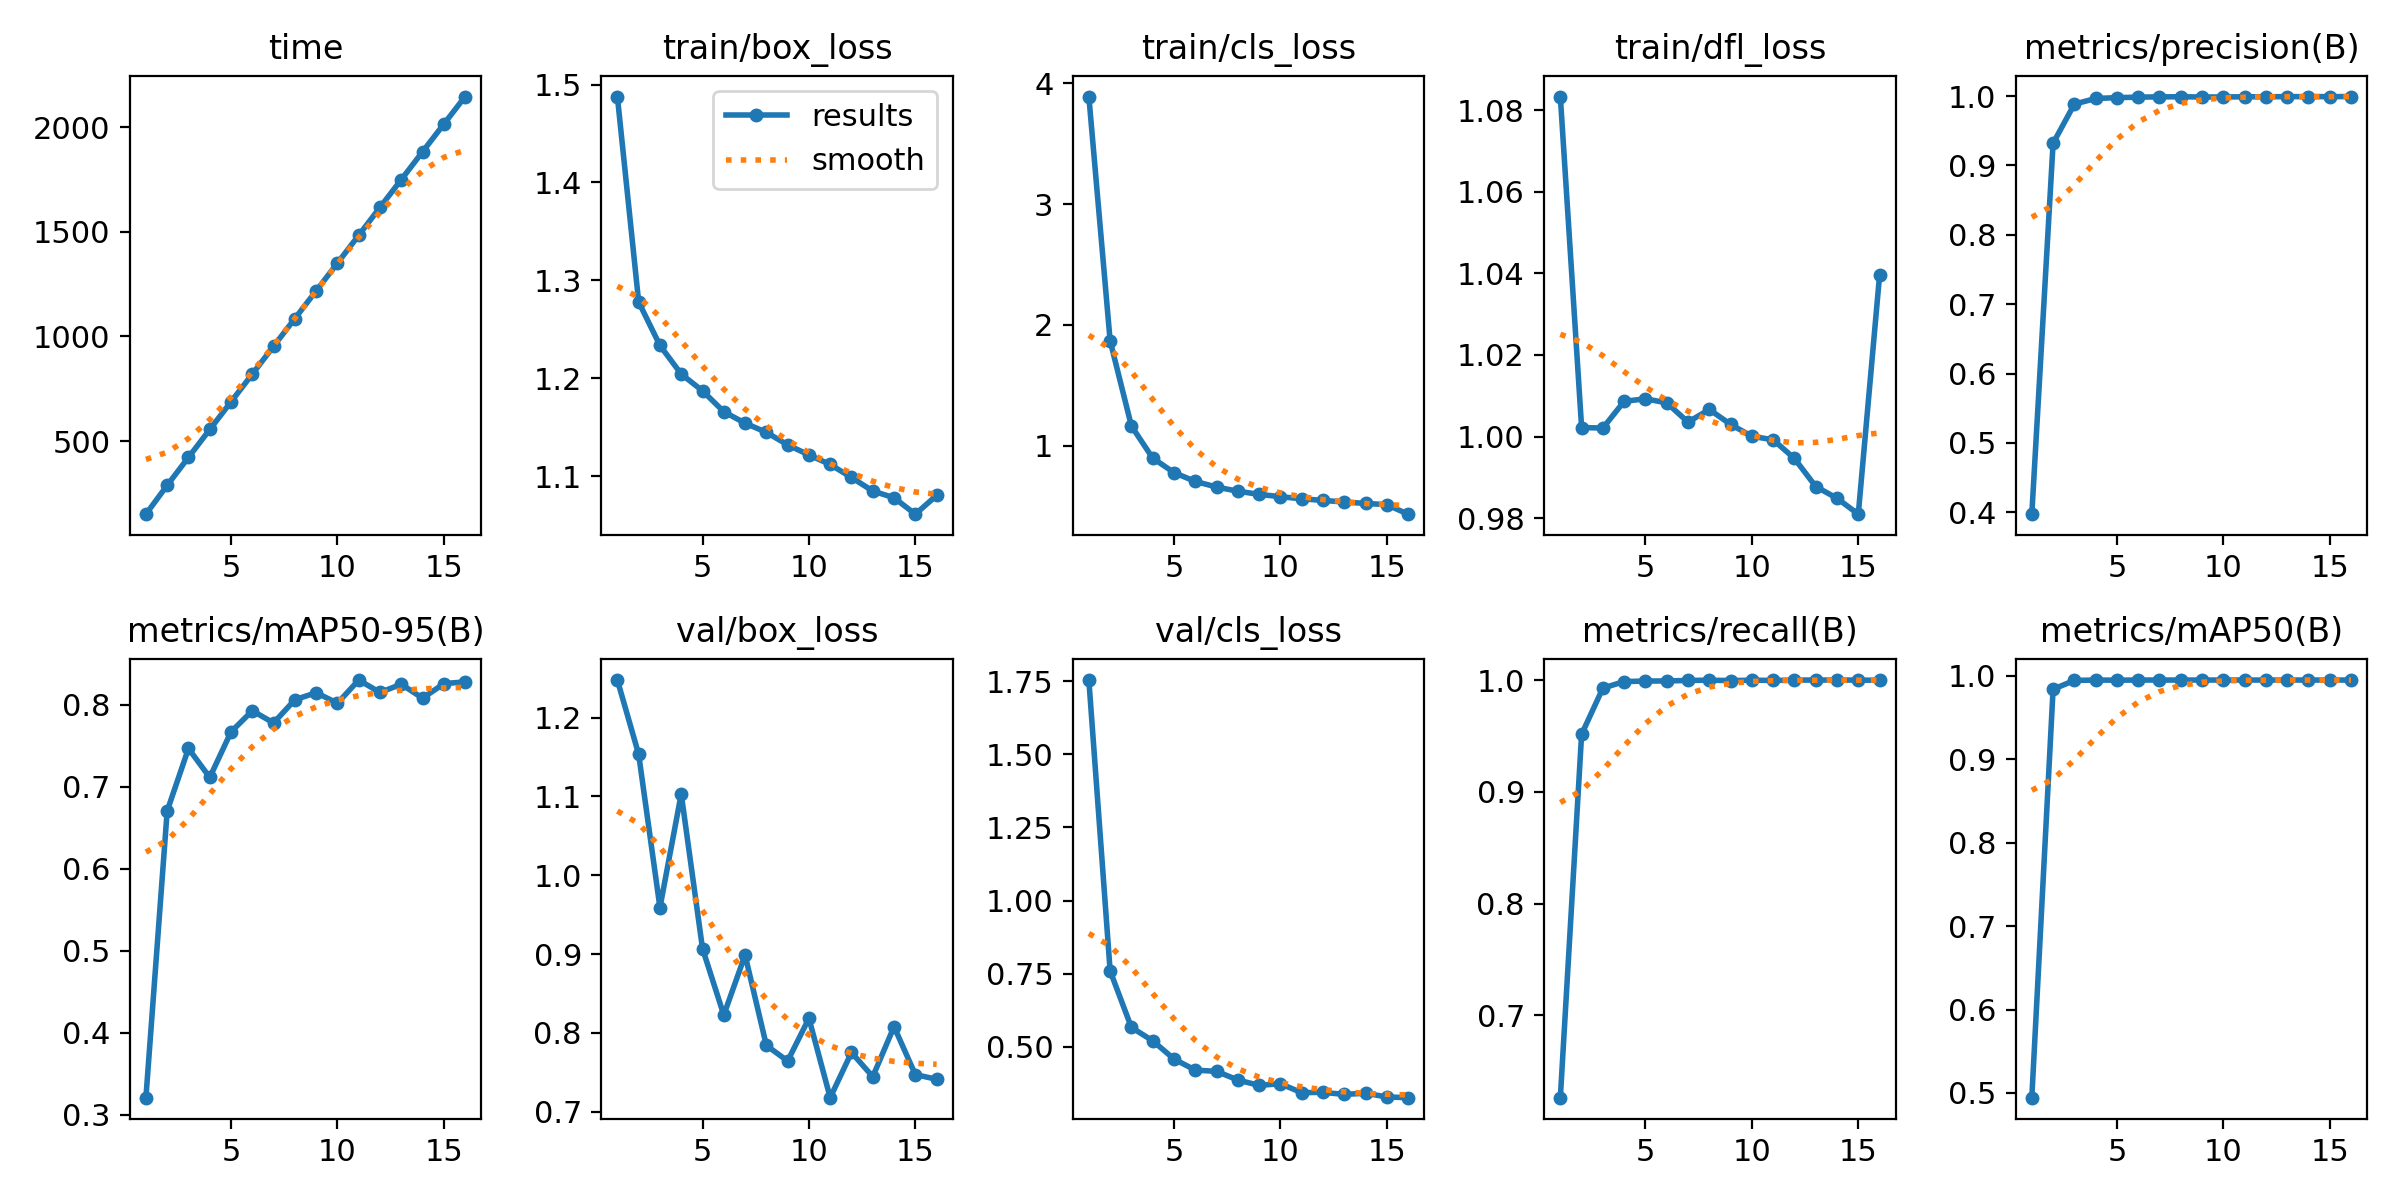

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


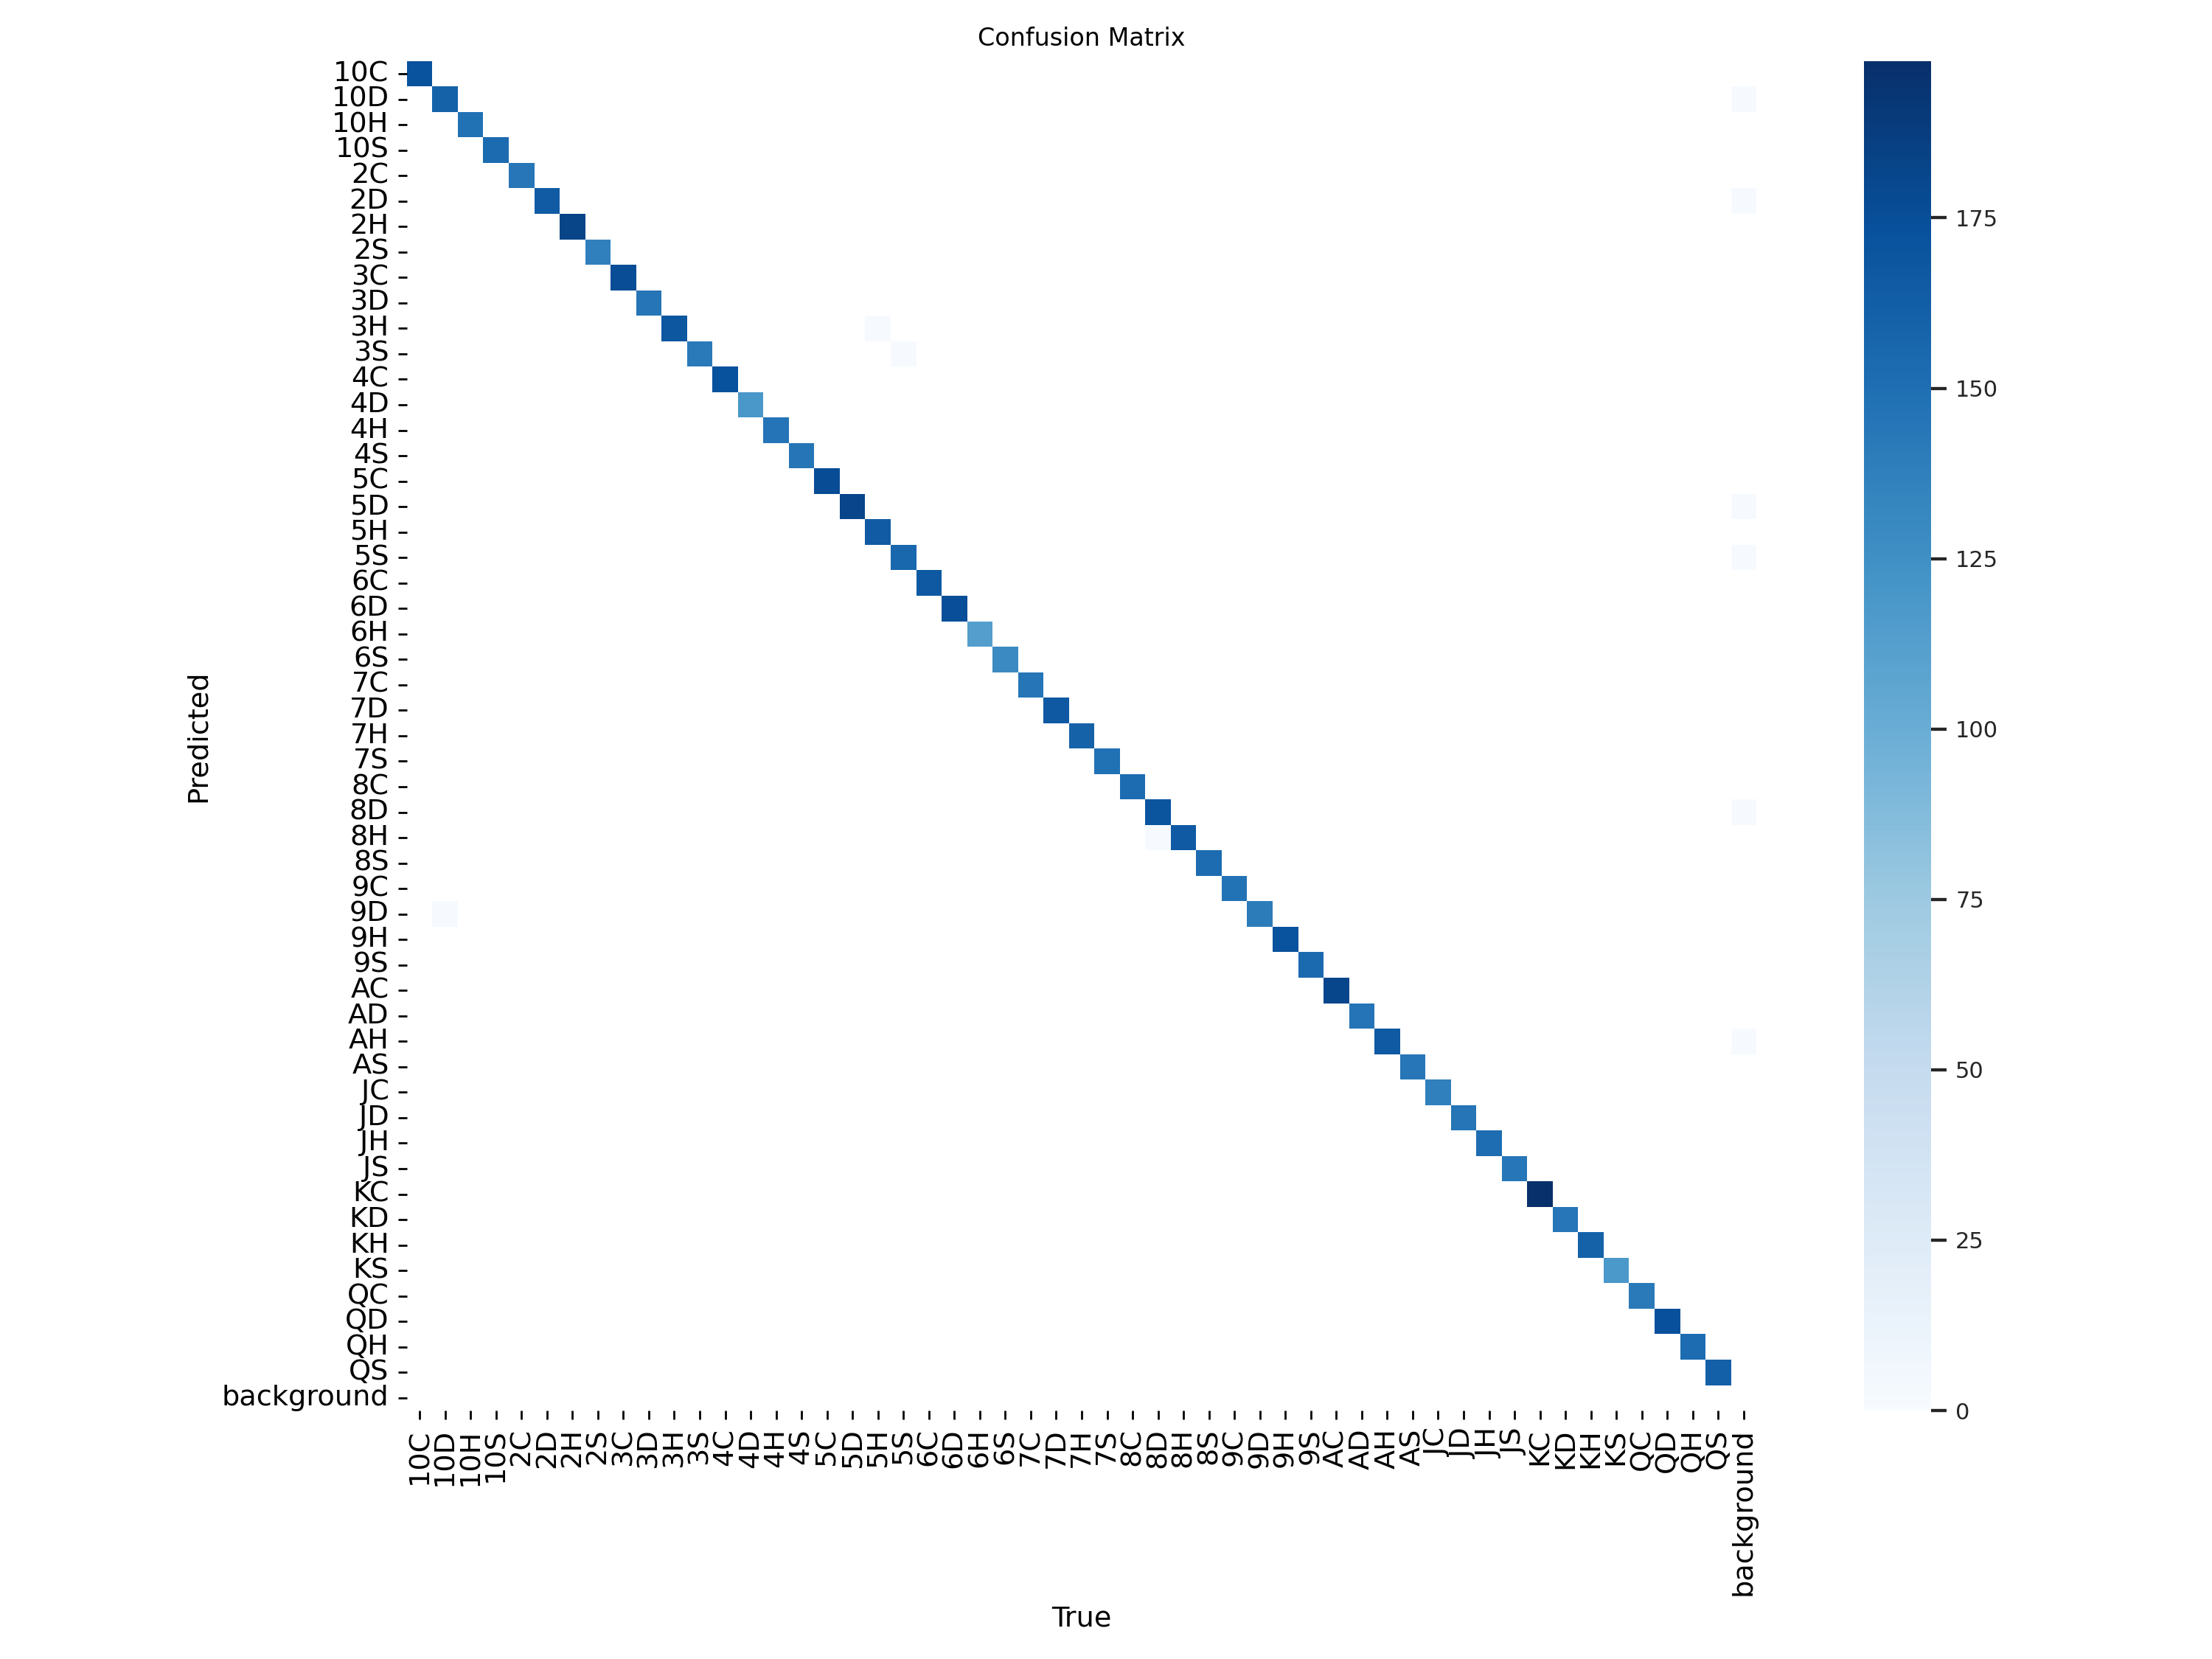

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 186 layers, 9,847,788 parameters, 0 gradients, 23.5 GFLOPs
val: Scanning /content/Playing-Cards-4/valid/labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100% 2020/2020 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 127/127 [00:12<00:00, 10.33it/s]
                   all       2020       8080      0.999          1      0.995      0.831
                   10C        129        172      0.999          1      0.995      0.821
                   10D        124        161      0.999          1      0.995      0.834
                   10H        103        148      0.999          1      0.995      0.854
                   10S        112        153      0.999          1      0.995      0.828
                    2C        106        144      0.999          1      0.995      0.842
                    2

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 186 layers, 9,847,788 parameters, 0 gradients, 23.5 GFLOPs

image 1/1010 /content/Playing-Cards-4/test/images/001771721_jpg.rf.687025a63ae5c9e58f2454ab1e41eaa9.jpg: 640x640 2 7Ss, 1 8S, 1 AH, 9.1ms
image 2/1010 /content/Playing-Cards-4/test/images/001783412_jpg.rf.7cec603b241d2bf2482ffbcdc4768def.jpg: 640x640 1 3S, 1 5C, 2 8Cs, 8.5ms
image 3/1010 /content/Playing-Cards-4/test/images/002352486_jpg.rf.d49841091883307acc1a1e5649420c56.jpg: 640x640 2 9Cs, 1 AD, 1 KS, 7.0ms
image 4/1010 /content/Playing-Cards-4/test/images/003123257_jpg.rf.add12eaf8df855e9fff1e77cc3012b29.jpg: 640x640 2 3Cs, 1 6H, 1 8H, 7.8ms
image 5/1010 /content/Playing-Cards-4/test/images/004452289_jpg.rf.120b399cd1176c627a8e933221c12df4.jpg: 640x640 1 2C, 1 7H, 2 9Ds, 7.9ms
image 6/1010 /content/Playing-Cards-4/test/images/004843130_jpg.rf.70d99d0334e006679aa00a74d4ea745b.jpg: 640x640 1 4H, 1 6D,

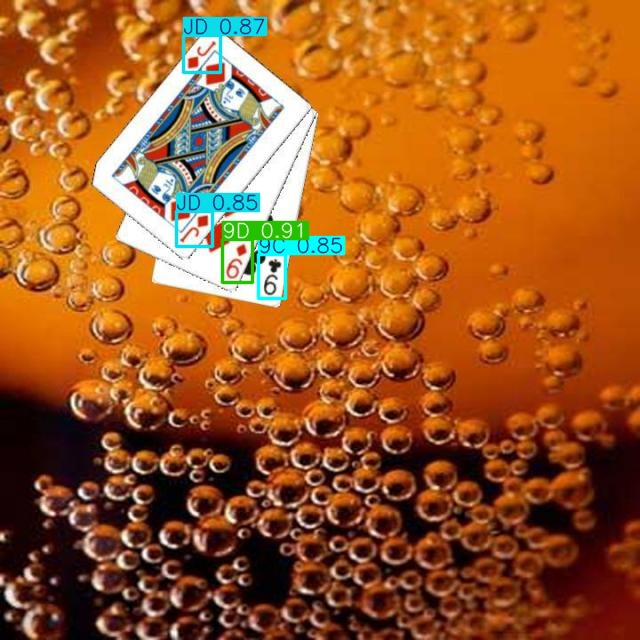

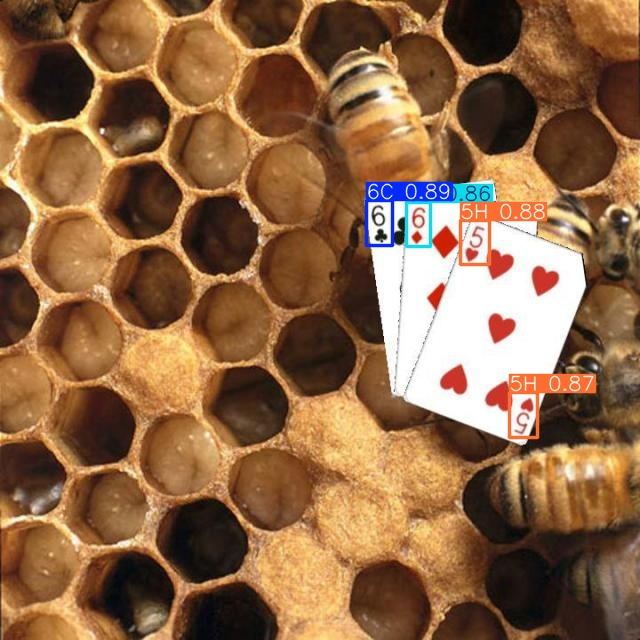

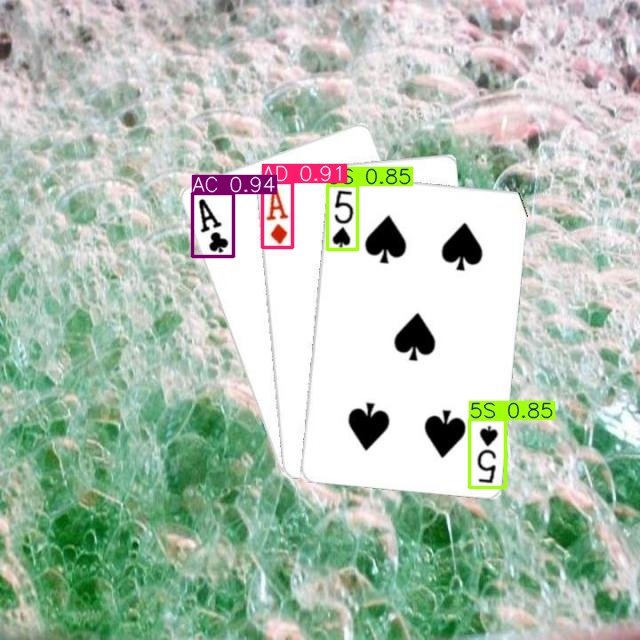

In [ ]:
import glob
from IPython.display import Image, display

base_path = '/content/runs/detect/'

subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
%cd {HOME}/runs/detect/train/weights
%ls
%cd {HOME}

/content/runs/detect/train/weights
best.pt  last.pt
/content


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Playing-Cards-4/video.mp4 save=True

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 186 layers, 9,847,788 parameters, 0 gradients, 23.5 GFLOPs

video 1/1 (frame 1/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 52.0ms
video 1/1 (frame 2/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 8.2ms
video 1/1 (frame 3/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.8ms
video 1/1 (frame 4/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.6ms
video 1/1 (frame 5/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.2ms
video 1/1 (frame 6/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.3ms
video 1/1 (frame 7/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.3ms
video 1/1 (frame 8/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.3ms
video 1/1 (frame 9/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.2ms
video 1/1 (frame 10/405) /content/Playing-Cards-4/video.mp4: 640x384 2 2Hs, 7.2ms
video 1/1 (

In [ ]:
%cd {HOME}
!ls -lh /content/runs/detect/train/weights/best.pt

/content
-rw-r--r-- 1 root root 20M Oct 10 01:15 /content/runs/detect/train/weights/best.pt


In [ ]:
%cd {HOME}

from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>